LSTM

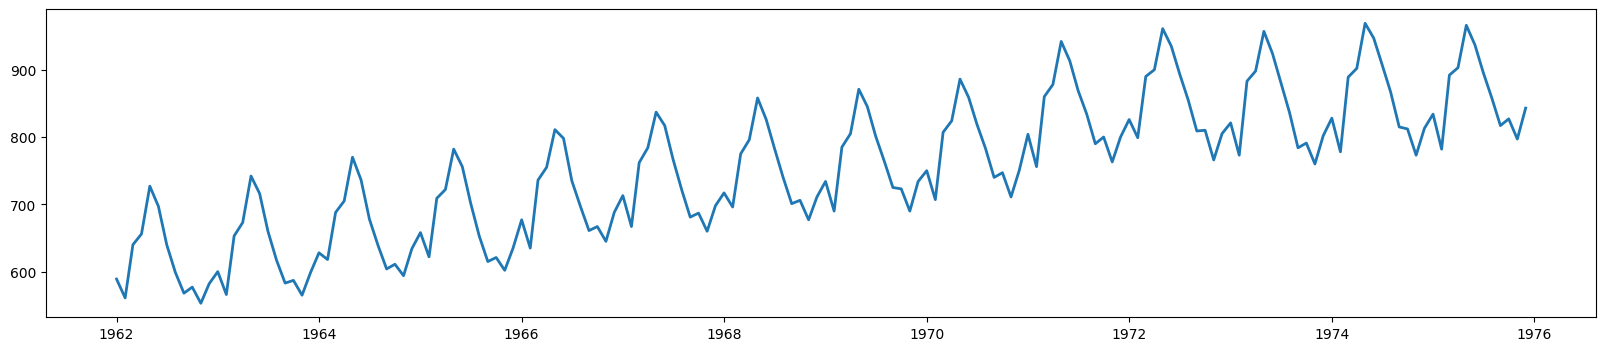

In [1]:
# LSTM Code for Timeseries Prediction
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("datasets/monthly-milk-production-pounds.csv", index_col='Month',parse_dates=True)
df.index.freq = 'MS'
df.shape
df.columns
plt.figure(figsize=(20, 4))
plt.plot(df.production,linewidth=2)
plt.show()

In [2]:
nobs = 12
df_train = df.iloc[:-nobs]
df_test = df.iloc[-nobs:]
df_train.shape
df_test.shape

(12, 1)

In [3]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_train)
scaled_train = scaler.transform(df_train)
scaled_test = scaler.transform(df_test)

In [4]:
n_inputs = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length = n_inputs, batch_size =1)
for i in range(len(generator)):
    X, y = generator[i]
    print(f' \n {X.flatten()} and {y}')
X.shape

 
 [0.08653846 0.01923077 0.20913462 0.24759615 0.41826923 0.34615385
 0.20913462 0.11057692 0.03605769 0.05769231 0.         0.06971154] and [[0.11298077]]
 
 [0.01923077 0.20913462 0.24759615 0.41826923 0.34615385 0.20913462
 0.11057692 0.03605769 0.05769231 0.         0.06971154 0.11298077] and [[0.03125]]
 
 [0.20913462 0.24759615 0.41826923 0.34615385 0.20913462 0.11057692
 0.03605769 0.05769231 0.         0.06971154 0.11298077 0.03125   ] and [[0.24038462]]
 
 [0.24759615 0.41826923 0.34615385 0.20913462 0.11057692 0.03605769
 0.05769231 0.         0.06971154 0.11298077 0.03125    0.24038462] and [[0.28846154]]
 
 [0.41826923 0.34615385 0.20913462 0.11057692 0.03605769 0.05769231
 0.         0.06971154 0.11298077 0.03125    0.24038462 0.28846154] and [[0.45432692]]
 
 [0.34615385 0.20913462 0.11057692 0.03605769 0.05769231 0.
 0.06971154 0.11298077 0.03125    0.24038462 0.28846154 0.45432692] and [[0.39182692]]
 
 [0.20913462 0.11057692 0.03605769 0.05769231 0.         0.06971154

(1, 12, 1)

In [37]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape = (n_inputs, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 200)               161600    
                                                                 
 dense_7 (Dense)             (None, 1)                 201       
                                                                 
Total params: 161801 (632.04 KB)
Trainable params: 161801 (632.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model.fit(generator, epochs = 50)

Epoch 1/50
144/144 [==============================] - 2s 8ms/step - loss: 0.0337
Epoch 2/50
144/144 [==============================] - 1s 7ms/step - loss: 0.0204
Epoch 3/50
144/144 [==============================] - 1s 7ms/step - loss: 0.0141
Epoch 4/50
144/144 [==============================] - 1s 7ms/step - loss: 0.0068
Epoch 5/50
144/144 [==============================] - 1s 7ms/step - loss: 0.0050
Epoch 6/50
144/144 [==============================] - 1s 7ms/step - loss: 0.0036
Epoch 7/50
144/144 [==============================] - 1s 7ms/step - loss: 0.0036
Epoch 8/50
144/144 [==============================] - 1s 7ms/step - loss: 0.0030
Epoch 9/50
144/144 [==============================] - 1s 7ms/step - loss: 0.0097
Epoch 10/50
144/144 [==============================] - 1s 7ms/step - loss: 0.0032
Epoch 11/50
144/144 [==============================] - 1s 7ms/step - loss: 0.0028
Epoch 12/50
144/144 [==============================] - 1s 7ms/step - loss: 0.0030
Epoch 13/50
144/144 [====

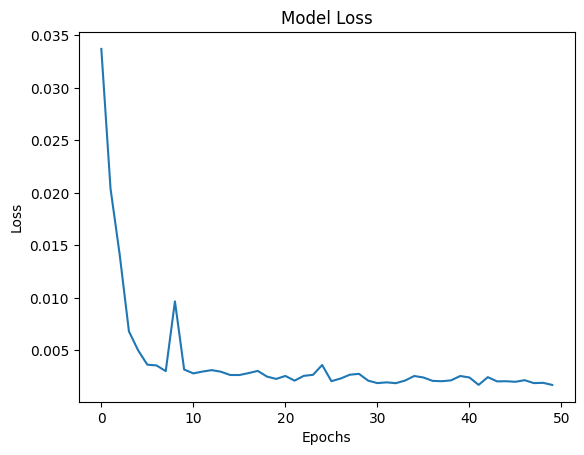

In [31]:
plt.plot(model.history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [32]:
last_train_batch = scaled_train[-12:]
last_train_batch = last_train_batch.reshape(1, 12, 1)
last_train_batch
model.predict(last_train_batch)

1/1 [==============================] - 0s 141ms/step


array([[0.6615823]], dtype=float32)

In [33]:
scaled_test[0]

array([0.67548077])

In [34]:
y_pred = []
first_batch = scaled_train[-n_inputs:]
current_batch = first_batch.reshape(1, n_inputs, n_features)
for i in range(len(scaled_test)):
    batch = current_batch
    pred = model.predict(batch)[0]
    y_pred.append(pred)
    current_batch = np.append(current_batch[:,1:, :], [[pred]], axis = 1)
y_pred
scaled_test

1/1 [==============================] - 0s 20ms/step


array([[0.67548077],
       [0.55048077],
       [0.81490385],
       [0.84134615],
       [0.99278846],
       [0.92307692],
       [0.82451923],
       [0.73317308],
       [0.63461538],
       [0.65865385],
       [0.58653846],
       [0.69711538]])

In [35]:
df_test
y_pred_transformed = scaler.inverse_transform(y_pred)
y_pred_transformed = np.round(y_pred_transformed,0)
y_pred_final = y_pred_transformed.astype(int)
y_pred_final
df_test.values, y_pred_final
df_test['Predictions'] = y_pred_final
df_test

C:\Users\DSL-189\AppData\Local\Temp\ipykernel_4228\3005097205.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Predictions'] = y_pred_final


,production,Predictions
Month,,
1975-01-01,834,828
1975-02-01,782,801
1975-03-01,892,884
1975-04-01,903,907
1975-05-01,966,960
1975-06-01,937,950
1975-07-01,896,919
1975-08-01,858,880
1975-09-01,817,831


In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(df_train.index, df_train['production'], linewidth=2, color='black', label='Train Values')
plt.plot(df_test.index, df_test['production'], linewidth=2, color='green', label='True Values')
plt.plot(df_test.index, df_test['Predictions'], linewidth=2, color='red', label='Predicted Values')
plt.legend()
plt.show()

GRU

In [38]:
model = Sequential()
model.add(GRU(200, activation='relu', input_shape = (n_inputs, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 200)               121800    
                                                                 
 dense_8 (Dense)             (None, 1)                 201       
                                                                 
Total params: 122001 (476.57 KB)
Trainable params: 122001 (476.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
model.fit(generator, epochs = 50)

Epoch 1/50
144/144 [==============================] - 2s 6ms/step - loss: 0.0354
Epoch 2/50
144/144 [==============================] - 1s 7ms/step - loss: 0.0198
Epoch 3/50
144/144 [==============================] - 1s 7ms/step - loss: 0.0167
Epoch 4/50
144/144 [==============================] - 1s 7ms/step - loss: 0.0132
Epoch 5/50
144/144 [==============================] - 1s 7ms/step - loss: 0.0084
Epoch 6/50
144/144 [==============================] - 1s 7ms/step - loss: 0.0078
Epoch 7/50
144/144 [==============================] - 1s 6ms/step - loss: 0.0077
Epoch 8/50
144/144 [==============================] - 1s 7ms/step - loss: 0.0070
Epoch 9/50
144/144 [==============================] - 1s 6ms/step - loss: 0.0079
Epoch 10/50
144/144 [==============================] - 1s 6ms/step - loss: 0.0058
Epoch 11/50
144/144 [==============================] - 1s 6ms/step - loss: 0.0056
Epoch 12/50
144/144 [==============================] - 1s 6ms/step - loss: 0.0061
Epoch 13/50
144/144 [====

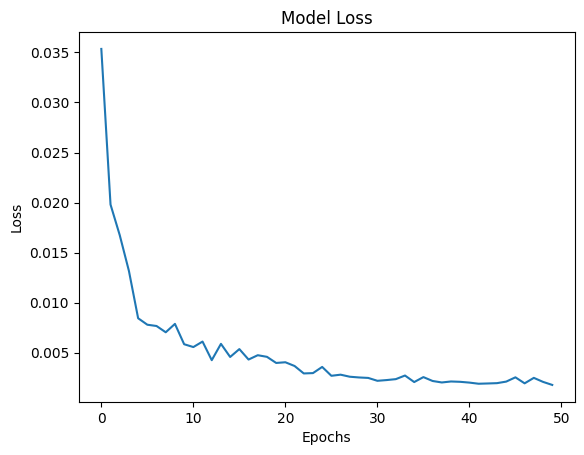

In [40]:
plt.plot(model.history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [41]:
last_train_batch = scaled_train[-12:]
last_train_batch = last_train_batch.reshape(1, 12, 1)
last_train_batch
model.predict(last_train_batch)

1/1 [==============================] - 0s 151ms/step


array([[0.6316993]], dtype=float32)

In [42]:
y_pred = []
first_batch = scaled_train[-n_inputs:]
current_batch = first_batch.reshape(1, n_inputs, n_features)
for i in range(len(scaled_test)):
    batch = current_batch
    pred = model.predict(batch)[0]
    y_pred.append(pred)
    current_batch = np.append(current_batch[:,1:, :], [[pred]], axis = 1)
y_pred
scaled_test

1/1 [==============================] - 0s 16ms/step


array([[0.67548077],
       [0.55048077],
       [0.81490385],
       [0.84134615],
       [0.99278846],
       [0.92307692],
       [0.82451923],
       [0.73317308],
       [0.63461538],
       [0.65865385],
       [0.58653846],
       [0.69711538]])

In [43]:
df_test
y_pred_transformed = scaler.inverse_transform(y_pred)
y_pred_transformed = np.round(y_pred_transformed,0)
y_pred_final = y_pred_transformed.astype(int)
y_pred_final
df_test.values, y_pred_final
df_test['Predictions'] = y_pred_final
df_test

C:\Users\DSL-189\AppData\Local\Temp\ipykernel_4228\3005097205.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Predictions'] = y_pred_final


,production,Predictions
Month,,
1975-01-01,834,816
1975-02-01,782,798
1975-03-01,892,874
1975-04-01,903,895
1975-05-01,966,949
1975-06-01,937,938
1975-07-01,896,905
1975-08-01,858,867
1975-09-01,817,825


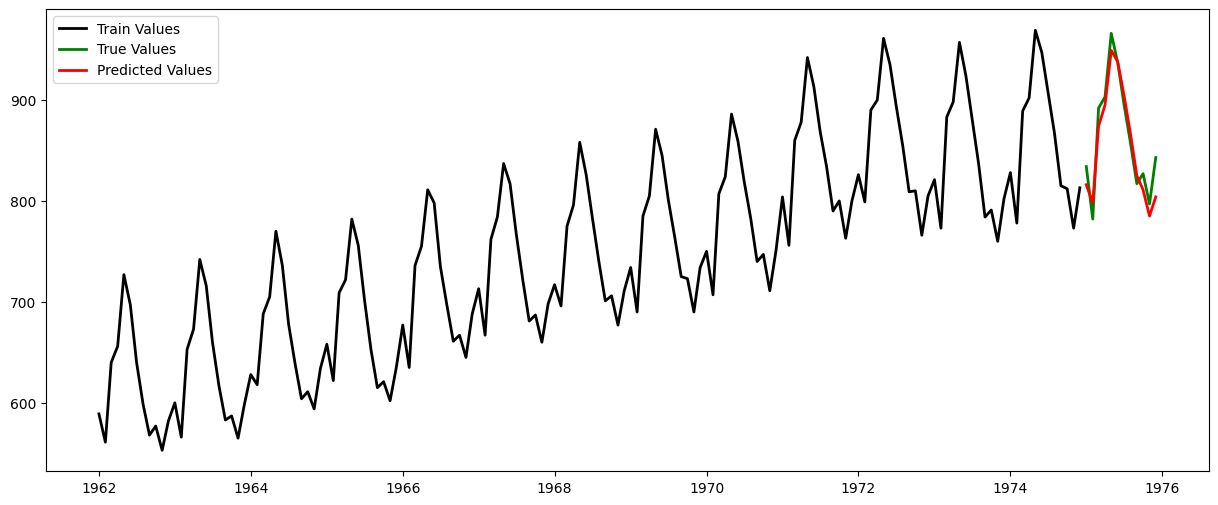

In [44]:
plt.figure(figsize=(15, 6))
plt.plot(df_train.index, df_train['production'], linewidth=2, color='black', label='Train Values')
plt.plot(df_test.index, df_test['production'], linewidth=2, color='green', label='True Values')
plt.plot(df_test.index, df_test['Predictions'], linewidth=2, color='red', label='Predicted Values')
plt.legend()
plt.show()